In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [132]:
!pip install googletrans==4.0.0-rc1

In [133]:
filename = "1.BYD-S7.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1915277418849333684,Thu Apr 24 05:31:35 +0000 2025,0,BYD kuasai daftar mobil listrik terlaris di In...,1915277418849333684,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191527741884933...,1404018642,NaN
1,1913379910095364375,Fri Apr 18 23:51:34 +0000 2025,0,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...,1913379910095364375,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191337991009536...,170144877,NaN
2,1912828189195551202,Thu Apr 17 11:19:13 +0000 2025,0,BYD Sealion 7 merupakan salah satu mobil sedan...,1912828189195551202,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191282818919555...,350668803,NaN
3,1912026249355985404,Tue Apr 15 06:12:36 +0000 2025,2,Btw gw mau beli mobil listrik Bang @sicupuh. M...,1912026249355985404,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/191202624935598...,94275536,NaN
4,1911994491998978489,Tue Apr 15 04:06:24 +0000 2025,0,Alhamdulillah punya mobil baru. BYD SEALION 7 ...,1911994491998978489,https://pbs.twimg.com/media/GojE24FWUAEdC4i.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/191199449199897...,550534628,NaN
5,1911206634745184725,Sat Apr 12 23:55:44 +0000 2025,0,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...,1911206634745184725,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191120663474518...,550534628,NaN
6,1911004099748782081,Sat Apr 12 10:30:56 +0000 2025,0,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...,1911004099748782081,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191100409974878...,1578222594,NaN
7,1910230323478282297,Thu Apr 10 07:16:14 +0000 2025,1,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...,1910230323478282297,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191023032347828...,1651120245124521986,NaN
8,1904016821214437595,Mon Mar 24 03:45:59 +0000 2025,0,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...,1904016821214437595,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/190401682121443...,2656665848,NaN
9,1904007191088202224,Mon Mar 24 03:07:43 +0000 2025,0,Dengan harga yang cukup terjangkau mobil ini h...,1904007191088202224,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/190400719108820...,350668803,NaN


# **Merapihkan kolom**

In [134]:
df = df.drop(columns=[
    'conversation_id_str',
    'created_at',
    'favorite_count',
    'id_str',
    'image_url',
    'in_reply_to_screen_name',
    'lang',
    'location',
    'quote_count',
    'reply_count',
    'retweet_count',
    'tweet_url',
    'user_id_str',
    'username'
])

df


,full_text
0,BYD kuasai daftar mobil listrik terlaris di In...
1,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...
2,BYD Sealion 7 merupakan salah satu mobil sedan...
3,Btw gw mau beli mobil listrik Bang @sicupuh. M...
4,Alhamdulillah punya mobil baru. BYD SEALION 7 ...
5,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...
6,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...
7,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...
8,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...
9,Dengan harga yang cukup terjangkau mobil ini h...


In [135]:
import pandas as pd

# misalnya dataframe kamu sudah ada dan kolomnya bernama "Comment"
df["full_text"] = df["full_text"].str.replace(r"@hdrnz", "", regex=True)

df["full_text"] = df["full_text"].str.replace(r"@\w+", "", regex=True)

df

,full_text
0,BYD kuasai daftar mobil listrik terlaris di In...
1,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...
2,BYD Sealion 7 merupakan salah satu mobil sedan...
3,Btw gw mau beli mobil listrik Bang . Menurut l...
4,Alhamdulillah punya mobil baru. BYD SEALION 7 ...
5,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...
6,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...
7,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...
8,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...
9,Dengan harga yang cukup terjangkau mobil ini h...


In [136]:
df.rename(columns={"full_text" : "Comment"}, inplace=True)

df

,Comment
0,BYD kuasai daftar mobil listrik terlaris di In...
1,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...
2,BYD Sealion 7 merupakan salah satu mobil sedan...
3,Btw gw mau beli mobil listrik Bang . Menurut l...
4,Alhamdulillah punya mobil baru. BYD SEALION 7 ...
5,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...
6,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...
7,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...
8,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...
9,Dengan harga yang cukup terjangkau mobil ini h...


Translate

In [137]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator

# inisialisasi translator
translator = Translator()

# translate kolom "Comment" ke English
df["Comment_en"] = df["Comment"].apply(
    lambda x: translator.translate(str(x), src="id", dest="en").text
)

df[["Comment","Comment_en"]].head()

IndexError: list index out of range

# **Cleaning Text**

In [ ]:
from googletrans import Translator

# inisialisasi translator
translator = Translator()

# translate kolom "Comment" ke English
df["Comment_en"] = df["Cleaned_comment"].apply(
    lambda x: translator.translate(str(x), src="id", dest="en").text
)

df[["Cleaned_comment", "Comment_en"]].head()

In [ ]:
df = df.drop(columns=['Cleaned_comment'])

df

In [ ]:
import re
import pandas as pd

# --- 1. Kamus kata tidak baku → kata baku ---
normalisasi_dict = {
    "gpp": "tidak apa apa",
    "bgt": "banget",
    "mantul": "mantap betul",
    "ga": "tidak",
    "nggak": "tidak",
    "aja": "saja",
    "klo": "kalau",
    "tdk": "tidak",
    "dr": "dari",
    "dgn": "dengan",
    "yg": "yang",
    "masak2": "matang matang"
}

# --- 2. Kamus brand/nama → format kapitalisasi benar ---
brand_dict = {
    "byd": "BYD",
    "toyota": "Toyota",
    "honda": "Honda",
    "wuling": "Wuling",
    "mitsubishi": "Mitsubishi",
    "hyundai": "Hyundai",
    "nissan": "Nissan",
    "suzuki": "Suzuki",
    "daihatsu": "Daihatsu",
    "tesla": "Tesla"
}

# --- Fungsi cleaning + normalisasi ---
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()

# --- Terapkan ke kolom comment ---
df['Cleaned_comment'] = df['Comment'].apply(clean_text)

# --- Lihat hasil ---
df_display = df[['Comment', 'Cleaned_comment']]
df_display.head(10)


,Comment,Cleaned_comment
0,BYD kuasai daftar mobil listrik terlaris di In...,byd kuasai daftar mobil listrik terlaris di in...
1,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...,ada mobil byd sealion mau masuk tol tapi pas...
2,BYD Sealion 7 merupakan salah satu mobil sedan...,byd sealion merupakan salah satu mobil sedan...
3,Btw gw mau beli mobil listrik Bang . Menurut l...,btw gw mau beli mobil listrik bang menurut l...
4,Alhamdulillah punya mobil baru. BYD SEALION 7 ...,alhamdulillah punya mobil baru byd sealion ...
5,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...,asyikkkkkkkk alhamdulillah bisa beli mobil by...
6,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...,dibekali fitur canggih byd sealion peroleh l...
7,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...,kenapa byd sealion jadi primadona baru mobil...
8,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...,pengen bgt mobil byd sealion semoga tahun de...
9,Dengan harga yang cukup terjangkau mobil ini h...,dengan harga yang cukup terjangkau mobil ini h...


In [ ]:
df = df.drop(columns=['Comment'])

df

,Cleaned_comment
0,byd kuasai daftar mobil listrik terlaris di in...
1,ada mobil byd sealion mau masuk tol tapi pas...
2,byd sealion merupakan salah satu mobil sedan...
3,btw gw mau beli mobil listrik bang menurut l...
4,alhamdulillah punya mobil baru byd sealion ...
5,asyikkkkkkkk alhamdulillah bisa beli mobil by...
6,dibekali fitur canggih byd sealion peroleh l...
7,kenapa byd sealion jadi primadona baru mobil...
8,pengen bgt mobil byd sealion semoga tahun de...
9,dengan harga yang cukup terjangkau mobil ini h...


In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator

# inisialisasi translator
translator = Translator()

# translate kolom "Comment" ke English
df["Comment_en"] = df["Cleaned_comment"].apply(
    lambda x: translator.translate(str(x), src="id", dest="en").text
)

df[["Cleaned_comment", "Comment_en"]].head()


,Cleaned_comment,Comment_en
0,byd kuasai daftar mobil listrik terlaris di in...,"Byd, control the list of the best -selling ele..."
1,ada mobil byd sealion mau masuk tol tapi pas...,there is a byd sealion car who wants to enter ...
2,byd sealion merupakan salah satu mobil sedan...,BYD SEALION is one of the Premium Electric Sed...
3,btw gw mau beli mobil listrik bang menurut l...,"Btw I want to buy an electric car, Bang accord..."
4,alhamdulillah punya mobil baru byd sealion ...,"Alhamdulillah, I have a new byd sealion car is..."


In [ ]:
df = df.drop(columns=['Cleaned_comment'])

df

,Comment_en
0,"Byd, control the list of the best -selling ele..."
1,there is a byd sealion car who wants to enter ...
2,BYD SEALION is one of the Premium Electric Sed...
3,"Btw I want to buy an electric car, Bang accord..."
4,"Alhamdulillah, I have a new byd sealion car is..."
5,Asyikkkkkkkkk alhamdulillah can buy a new byd ...
6,Equipped with sophisticated features byd seali...
7,why byd sealion so the new excellent electric ...
8,"I want to be a byd sealion car, hopefully next..."
9,With a fairly affordable price this car comes ...


In [ ]:
# --- Fungsi cleaning + normalisasi ---
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()

# --- Terapkan ke kolom comment ---
df['Cleaned_comment_en'] = df['Comment_en'].apply(clean_text)

# --- Lihat hasil ---
df_display.head(10)

,Comment,Cleaned_comment
0,BYD kuasai daftar mobil listrik terlaris di In...,byd kuasai daftar mobil listrik terlaris di in...
1,Ada mobil BYD Sealion 7 mau masuk tol tapi pas...,ada mobil byd sealion mau masuk tol tapi pas...
2,BYD Sealion 7 merupakan salah satu mobil sedan...,byd sealion merupakan salah satu mobil sedan...
3,Btw gw mau beli mobil listrik Bang . Menurut l...,btw gw mau beli mobil listrik bang menurut l...
4,Alhamdulillah punya mobil baru. BYD SEALION 7 ...,alhamdulillah punya mobil baru byd sealion ...
5,Asyikkkkkkkk. Alhamdulillah bisa beli mobil BY...,asyikkkkkkkk alhamdulillah bisa beli mobil by...
6,Dibekali Fitur Canggih BYD Sealion 7 Peroleh L...,dibekali fitur canggih byd sealion peroleh l...
7,Kenapa BYD Sealion 7 Jadi Primadona Baru Mobil...,kenapa byd sealion jadi primadona baru mobil...
8,Pengen bgt mobil BYD Sealion 7 Semoga tahun de...,pengen bgt mobil byd sealion semoga tahun de...
9,Dengan harga yang cukup terjangkau mobil ini h...,dengan harga yang cukup terjangkau mobil ini h...


In [ ]:
def count_punct(text):
    # kalau text kosong atau None, langsung return 0
    if not text or (len(text) - text.count(" ")) == 0:
        return 0
    
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

# hitung panjang teks tanpa spasi
df['Review_len'] = df['Cleaned_comment'].apply(lambda x: len(x) - x.count(" "))

# hitung persentase tanda baca
df['punct'] = df['Cleaned_comment'].apply(lambda x: count_punct(x))

df.head()


KeyError: 'Cleaned_comment'

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['Cleaned_comment'].apply(lambda x: tokenize_text(x))
df.head()

,Cleaned_comment,Cleaned_comment_en,Review_len,punct,tokens
0,byd kuasai daftar mobil listrik terlaris di in...,"Byd, control the list of the best -selling ele...",119,0.0,"[byd, kuasai, daftar, mobil, listrik, terlaris..."
1,ada mobil byd sealion mau masuk tol tapi pas...,there is a byd sealion car who wants to enter ...,64,0.0,"[ada, mobil, byd, sealion, mau, masuk, tol, ta..."
2,byd sealion merupakan salah satu mobil sedan...,BYD SEALION is one of the Premium Electric Sed...,119,0.0,"[byd, sealion, merupakan, salah, satu, mobil, ..."
3,btw gw mau beli mobil listrik bang menurut l...,"Btw I want to buy an electric car, Bang accord...",140,0.0,"[btw, gw, mau, beli, mobil, listrik, bang, men..."
4,alhamdulillah punya mobil baru byd sealion ...,"Alhamdulillah, I have a new byd sealion car is...",203,0.0,"[alhamdulillah, punya, mobil, baru, byd, seali..."


<h2>Lemmatization and Removing Stopwords</h2>

In [ ]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopwords NLTK
nltk.download('stopwords')

# Stopwords English dari NLTK
stopwords_en = stopwords.words('english')
stopwords_en.remove('not')   # kalau mau keep kata 'not'

# Stopwords Indonesian dari NLTK
stopwords_id_nltk = stopwords.words("indonesian")

# Stopwords Indonesian dari Sastrawi
factory = StopWordRemoverFactory()
stopwords_id_sastrawi = factory.get_stop_words()

# Gabungkan stopwords indo (NLTK + Sastrawi)
stopwords_id = set(stopwords_id_nltk + stopwords_id_sastrawi)

# Gabungkan semua stopwords
all_stopwords = set(stopwords_en + list(stopwords_id))

# Buat stemmer Sastrawi
stemmer = StemmerFactory().create_stemmer()

# Contoh penggunaan pada teks
sample_text = "Saya tidak suka makanan yang buruk dan jelek sekali."
tokens = sample_text.lower().split()

# Hilangkan stopwords + stemming
filtered_tokens = [stemmer.stem(word) for word in tokens if word not in all_stopwords]

ModuleNotFoundError: No module named 'Sastrawi'

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edlyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\edlyn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Comment,Cleaned_comment,Cleaned_comment_en,Review_len,punct,tokens,lemmatized_review
0,Secara teratur BYD melapor kok ke Kemeninvest...,secara teratur byd melapor kok ke kemeninvest...,regularly byd reports to the Ministry of Finan...,194,0.0,"[secara, teratur, byd, melapor, kok, ke, kemen...",secara teratur byd melapor kok ke kemeninvest ...
1,Kaum menengah kebawah dirugikan dengan tidak ...,kaum menengah kebawah dirugikan dengan tidak ...,The middle class is disadvantaged by no one wh...,153,0.0,"[kaum, menengah, kebawah, dirugikan, dengan, t...",kaum menengah kebawah dirugikan dengan tidak a...
2,Hyundai nya nangis dealernya pun nangis karen...,hyundai nya nangis dealernya pun nangis karen...,"The hyundai is crying, the dealer is crying be...",71,0.0,"[hyundai, nya, nangis, dealernya, pun, nangis,...",hyundai nya nangis dealernya pun nangis karena...
3,Emang regulasinya kacau. suka2 aja. Tp sbg ko...,emang regulasinya kacau suka aja tp sbg ko...,indeed the regulation is chaotic but as a cons...,96,0.0,"[emang, regulasinya, kacau, suka, aja, tp, sbg...",emang regulasinya kacau suka aja tp sbg konsum...
4,Ini yg isunya kmrn Hyundai misuh2 ancam cabut...,ini yg isunya kmrn hyundai misuh ancam cabut...,This is the issue that Hyundai Misuh Threatens...,183,0.0,"[ini, yg, isunya, kmrn, hyundai, misuh, ancam,...",ini yg isunya kmrn hyundai misuh ancam cabut d...


In [ ]:
# Token kata positif dan negatif
positive_tokens = ["bagus", "mantap", "keren", "wow", "hebat"]
negative_tokens = ["jelek", "buruk", "tai", "gagal", "parah"]

# Buat label sentimen
df['sentiment_label'] = df['Comment'].apply(
    lambda x: "positive" if any(word in str(x).lower() for word in positive_tokens) 
    else ("negative" if any(word in str(x).lower() for word in negative_tokens) 
    else "neutral")
)
k
# Pisahkan data berdasarkan label
positive_comments = df[df['sentiment_label'] == 'positive']
negative_comments = df[df['sentiment_label'] == 'negative']
neutral_comments  = df[df['sentiment_label'] == 'neutral']

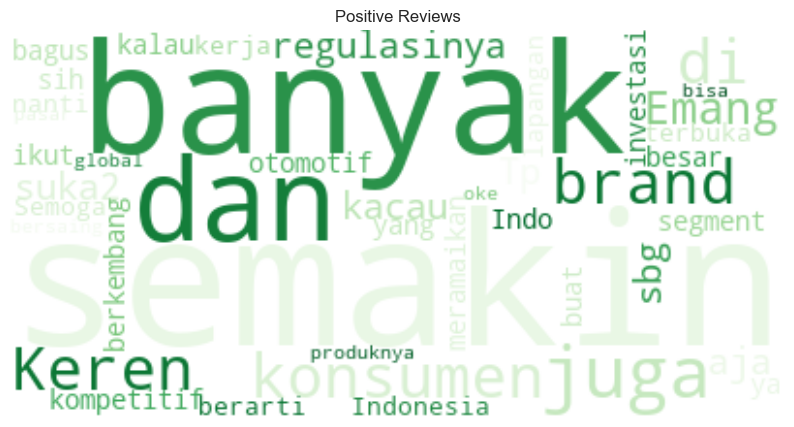

In [ ]:
# Gabungkan semua komentar positif jadi satu string
positive_text = " ".join(positive_comments['Comment'].astype(str))

# Buat wordcloud untuk komentar positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Greens"
).generate(positive_text)

# Tampilkan hasil wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews")
plt.show()

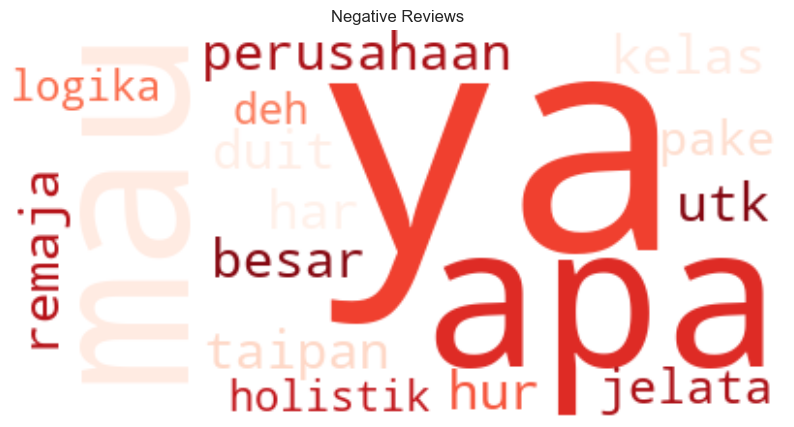

In [ ]:
# Gabungkan semua komentar positif jadi satu string
negative_text = " ".join(negative_comments['Comment'].astype(str))

# Buat wordcloud untuk komentar positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Reds"
).generate(negative_text)

# Tampilkan hasil wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews")
plt.show()